In [1]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px # Visualization tool like Matplotlib
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,iplot
import cufflinks as cf

# Manipulating the default plot size
#plt.rcParams['figure.figsize'] = 10, 12
plt.rcParams['figure.figsize']=25,18
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
#GEtting Plotly offline 
pyo.init_notebook_mode(connected=True)
cf.go_offline()

## Reading the Datasets


In [4]:
df = pd.read_csv(r'D:\Python37\Projects\covid_19_data.csv')


In [5]:
df.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
df.rename(columns={'Country/Region':'Country'}, inplace=True)


In [7]:
df.rename(columns={'Province/State':'State'}, inplace=True)


In [8]:
df.tail()

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
172475,172476,12/06/2020,Zaporizhia Oblast,Ukraine,2020-12-07 05:26:14,36539.0,337.0,6556.0
172476,172477,12/06/2020,Zeeland,Netherlands,2020-12-07 05:26:14,6710.0,104.0,0.0
172477,172478,12/06/2020,Zhejiang,Mainland China,2020-12-07 05:26:14,1295.0,1.0,1288.0
172478,172479,12/06/2020,Zhytomyr Oblast,Ukraine,2020-12-07 05:26:14,31967.0,531.0,22263.0
172479,172480,12/06/2020,Zuid-Holland,Netherlands,2020-12-07 05:26:14,154813.0,2414.0,0.0


# Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172480 entries, 0 to 172479
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              172480 non-null  int64  
 1   ObservationDate  172480 non-null  object 
 2   State            124597 non-null  object 
 3   Country          172480 non-null  object 
 4   Last Update      172480 non-null  object 
 5   Confirmed        172480 non-null  float64
 6   Deaths           172480 non-null  float64
 7   Recovered        172480 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.5+ MB


In [10]:
df.isnull().sum()

SNo                    0
ObservationDate        0
State              47883
Country                0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [11]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,172480.000000,1.724800e+05,172480.000000,1.724800e+05
mean,86240.500000,3.323156e+04,1050.030966,2.102825e+04
std,49790.831552,1.031349e+05,3499.436401,1.156598e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,43120.750000,4.570000e+02,6.000000,1.000000e+01
50%,86240.500000,4.016500e+03,76.000000,8.580000e+02
75%,129360.250000,1.884300e+04,554.000000,7.229000e+03
max,172480.000000,2.290891e+06,54804.000000,5.624444e+06


# Data Visualization

In [12]:
#df.style.background_gradient(cmap='Reds')

In [13]:
confirmed = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
confirmed

,ObservationDate,Confirmed
0,01/22/2020,555.0
1,01/23/2020,653.0
2,01/24/2020,941.0
3,01/25/2020,1438.0
4,01/26/2020,2118.0
...,...,...
315,12/02/2020,64530517.0
316,12/03/2020,65221040.0
317,12/04/2020,65899441.0
318,12/05/2020,66540034.0


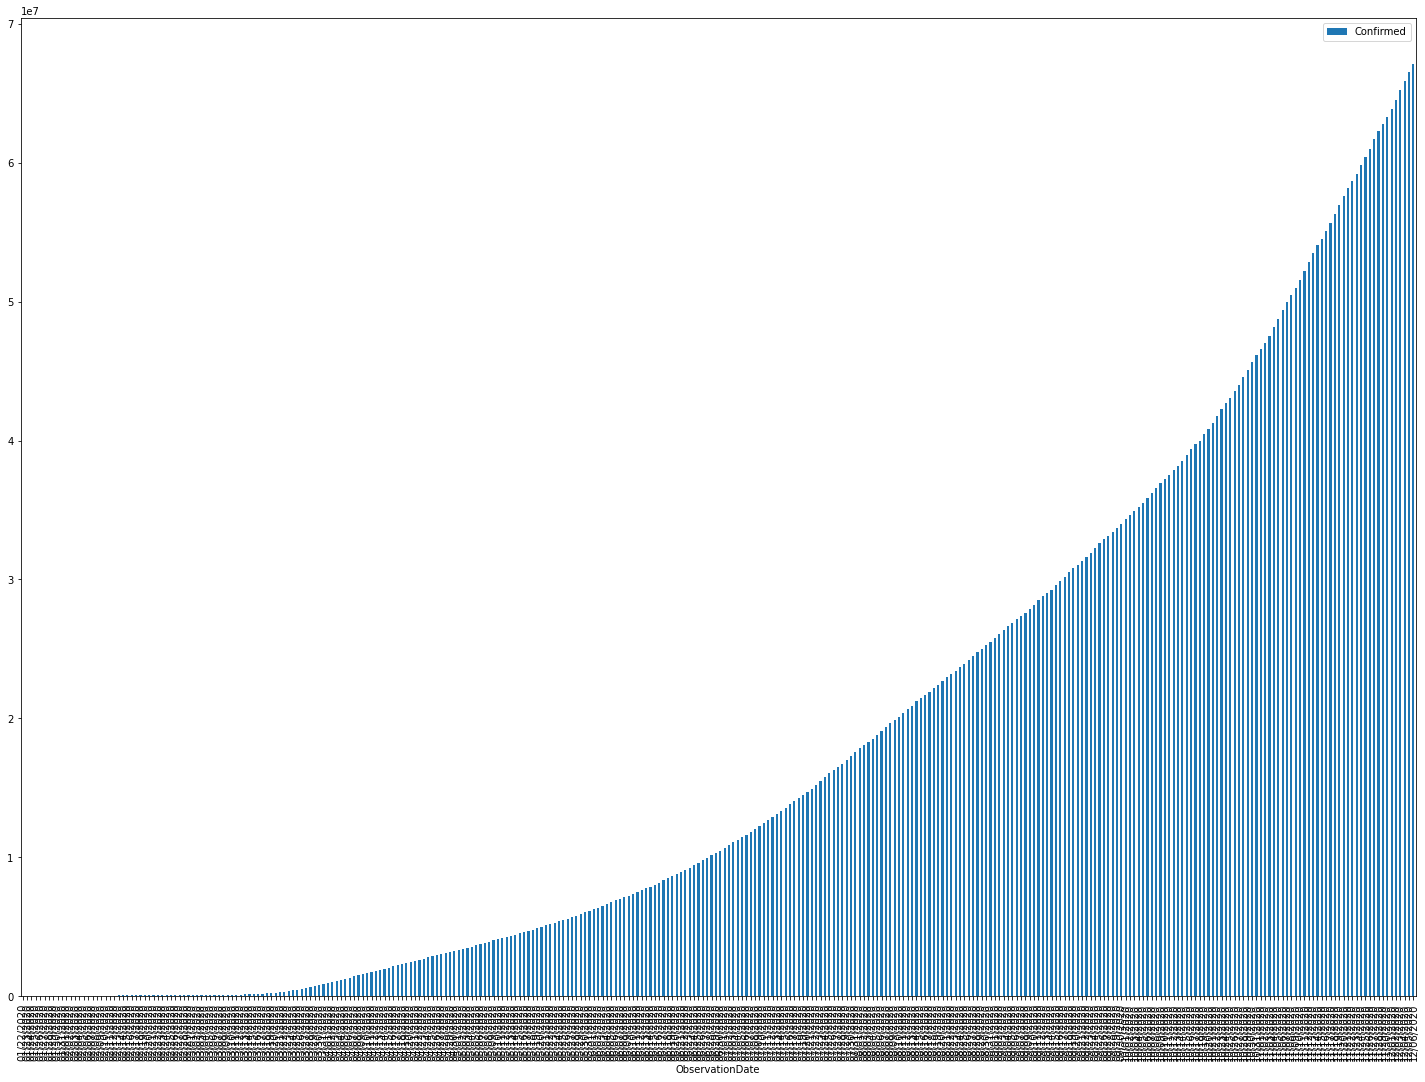

In [14]:
#Pandas Visualization 
confirmed.plot(kind='bar',x='ObservationDate',y='Confirmed')
plt.show()

In [16]:
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
deaths

,ObservationDate,Deaths
0,01/22/2020,17.0
1,01/23/2020,18.0
2,01/24/2020,26.0
3,01/25/2020,42.0
4,01/26/2020,56.0
...,...,...
315,12/02/2020,1493742.0
316,12/03/2020,1506260.0
317,12/04/2020,1518670.0
318,12/05/2020,1528868.0


In [18]:
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()
recovered

,ObservationDate,Recovered
0,01/22/2020,28.0
1,01/23/2020,30.0
2,01/24/2020,36.0
3,01/25/2020,39.0
4,01/26/2020,52.0
...,...,...
315,12/02/2020,41496318.0
316,12/03/2020,41932091.0
317,12/04/2020,42352021.0
318,12/05/2020,42789879.0


# Making the Prediction using FB Prophet

In [20]:
from fbprophet import Prophet

In [21]:
df.head()

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [22]:
confirmed = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()

In [23]:
confirmed.tail(10)

,ObservationDate,Confirmed
310,11/27/2020,61687701.0
311,11/28/2020,62286402.0
312,11/29/2020,62773116.0
313,11/30/2020,63279026.0
314,12/01/2020,63883985.0
315,12/02/2020,64530517.0
316,12/03/2020,65221040.0
317,12/04/2020,65899441.0
318,12/05/2020,66540034.0
319,12/06/2020,67073728.0


In [24]:
deaths.tail(10)

,ObservationDate,Deaths
310,11/27/2020,1443110.0
311,11/28/2020,1452852.0
312,11/29/2020,1459771.0
313,11/30/2020,1468458.0
314,12/01/2020,1481306.0
315,12/02/2020,1493742.0
316,12/03/2020,1506260.0
317,12/04/2020,1518670.0
318,12/05/2020,1528868.0
319,12/06/2020,1536056.0


In [25]:
recovered.tail(10)

,ObservationDate,Recovered
310,11/27/2020,39476664.0
311,11/28/2020,39831868.0
312,11/29/2020,40157966.0
313,11/30/2020,40559353.0
314,12/01/2020,41034934.0
315,12/02/2020,41496318.0
316,12/03/2020,41932091.0
317,12/04/2020,42352021.0
318,12/05/2020,42789879.0
319,12/06/2020,43103827.0


The input to Prophet is always a dataframe with two columns: **ds** and **y**. The **ds (datestamp)** column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [26]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [27]:
confirmed.head()

,ds,y
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0


In [28]:
confirmed.tail()

,ds,y
315,2020-12-02,64530517.0
316,2020-12-03,65221040.0
317,2020-12-04,65899441.0
318,2020-12-05,66540034.0
319,2020-12-06,67073728.0



##4.1 Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [29]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [30]:
m = Prophet(interval_width=0.95) #Interval width is the prediction accuracy we count on the model
m.fit(confirmed)
future = m.make_future_dataframe(periods=131) #making a dataframe for no. of dates


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
future.tail(140)

,ds
311,2020-11-28
312,2020-11-29
313,2020-11-30
314,2020-12-01
315,2020-12-02
316,2020-12-03
317,2020-12-04
318,2020-12-05
319,2020-12-06
320,2020-12-07


The **predict** method will assign each row in future a predicted value which it names **yhat**. If you pass in historical dates, it will provide an in-sample fit. The **forecast object** here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [32]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(140)
'''
ds= date
yhat = prediction
lower & upper = limit

''' 


,ds,yhat,yhat_lower,yhat_upper
311,2020-11-28,61423717.970,60490939.593,62244548.137
312,2020-11-29,61898080.614,61033871.182,62873806.948
313,2020-11-30,62342528.200,61438348.723,63233682.091
314,2020-12-01,62841149.686,61879795.062,63753312.821
315,2020-12-02,63363222.171,62423692.133,64264800.753
316,2020-12-03,63887361.235,63030099.322,64766679.998
317,2020-12-04,64420052.151,63480265.236,65267790.398
318,2020-12-05,64925773.715,64077978.199,65869292.908
319,2020-12-06,65400136.359,64478557.858,66241326.065
320,2020-12-07,65844583.945,64987202.317,66782103.017


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

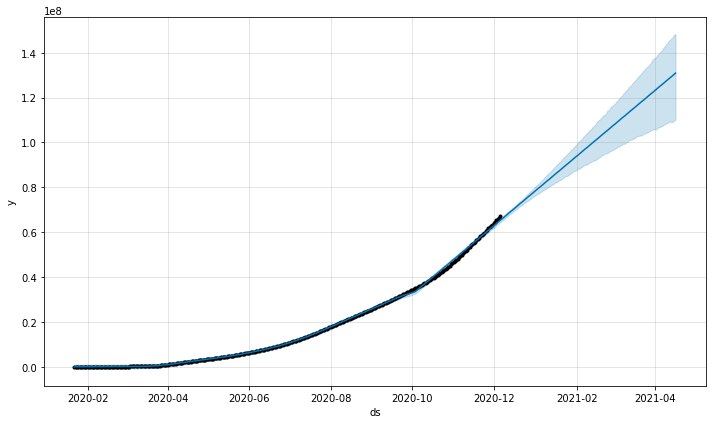

In [33]:
confirmed_forecast_plot = m.plot(forecast)

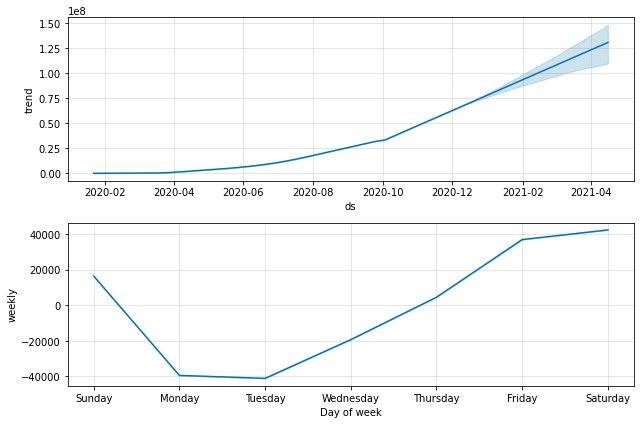

In [34]:
confirmed_forecast_plot =m.plot_components(forecast)

In [35]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [36]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=131)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
446,2021-04-12
447,2021-04-13
448,2021-04-14
449,2021-04-15
450,2021-04-16


In [37]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(140)

,ds,yhat,yhat_lower,yhat_upper
311,2020-11-28,1434583.006,1415974.344,1453991.840
312,2020-11-29,1440865.428,1420864.644,1460728.601
313,2020-11-30,1446668.856,1427735.400,1465936.183
314,2020-12-01,1454938.541,1435968.522,1473943.127
315,2020-12-02,1463462.430,1444423.483,1484069.463
316,2020-12-03,1471885.530,1452334.378,1491087.169
317,2020-12-04,1480181.400,1460661.568,1497235.351
318,2020-12-05,1487619.489,1468862.482,1505241.625
319,2020-12-06,1493901.911,1475769.666,1514229.517
320,2020-12-07,1499705.339,1480839.968,1519206.201


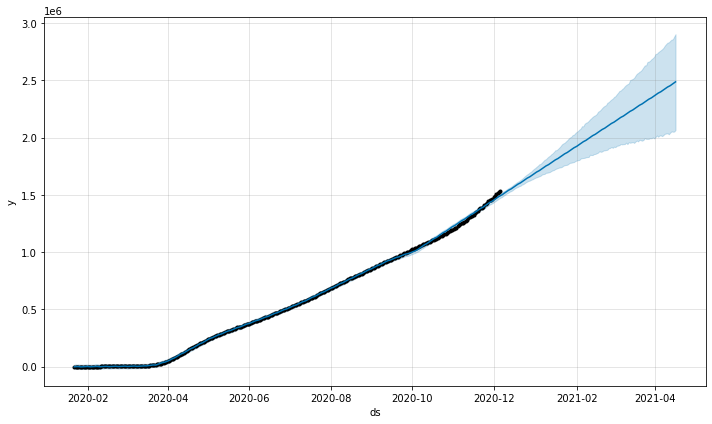

In [38]:
deaths_forecast_plot = m.plot(forecast)

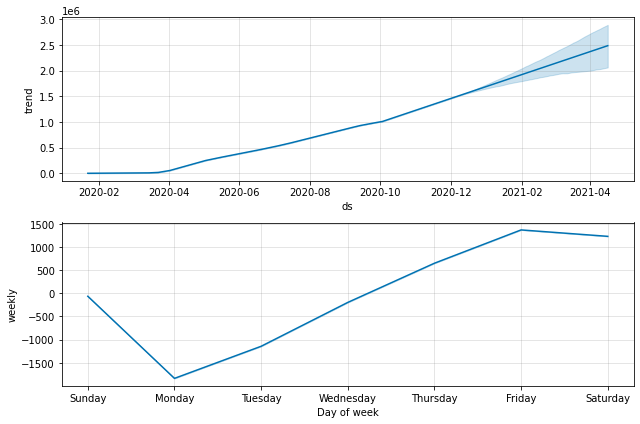

In [39]:
deaths_forecast_plot = m.plot_components(forecast)

##4.3 Forecasting Worldwide Recovered Cases with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [40]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [41]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=131)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
446,2021-04-12
447,2021-04-13
448,2021-04-14
449,2021-04-15
450,2021-04-16


In [42]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(140)

,ds,yhat,yhat_lower,yhat_upper
311,2020-11-28,39320894.421,38674340.372,39901404.831
312,2020-11-29,39586938.086,38975869.883,40180559.109
313,2020-11-30,39831782.746,39228489.052,40462881.393
314,2020-12-01,40126739.173,39535613.834,40757971.215
315,2020-12-02,40425351.785,39808512.679,41010585.878
316,2020-12-03,40707452.804,40131573.233,41322530.163
317,2020-12-04,40975724.751,40342644.959,41598468.891
318,2020-12-05,41279094.861,40648688.626,41908643.929
319,2020-12-06,41545138.527,40921624.264,42184845.592
320,2020-12-07,41789983.187,41199291.050,42399688.815


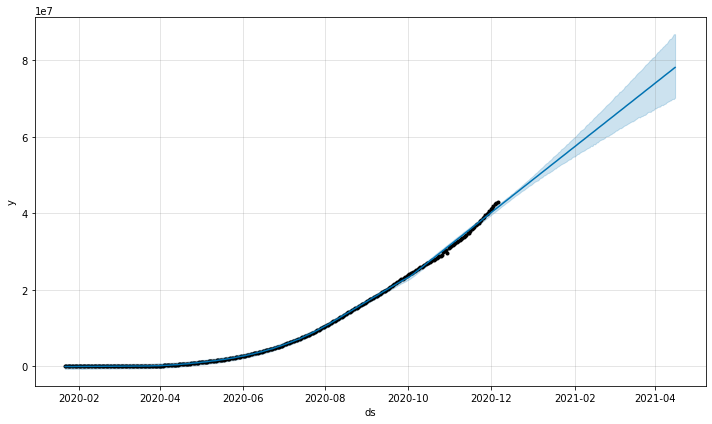

In [43]:
recovered_forecast_plot = m.plot(forecast)

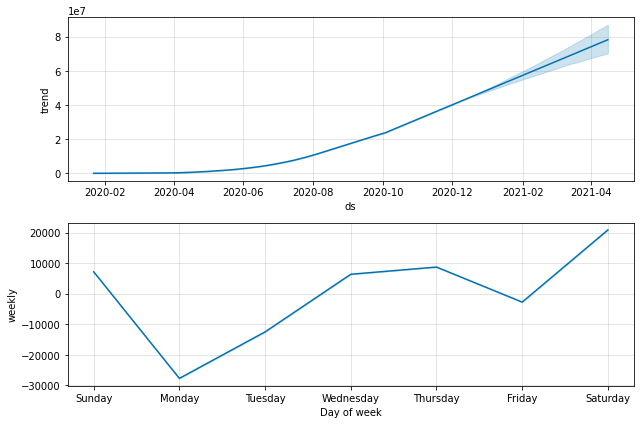

In [44]:
recovered_forecast_plot = m.plot_components(forecast)


##4.4 Inference from the above Analysis and Forecast
###Will Indian become the next Italy/ S.Korea/ Wuhan?


#**Data Source:**
- https://www.mohfw.gov.in/
- https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset